# PROJETO DE ELETROMAGNETISMO E ONDULATÓRIA: CARREGADORES ELÉTRICOS SEM FIO.

## Alunos: 
### Marco Moliterno Pena Piacentini
### Mariana Sophia Abrantes 
### Pedro Braga Carani 

# Resolução do ITEM 8 - Unindo dois modelos.

In [129]:
from cmath import *
import numpy as np
import matplotlib.pyplot as plt
from cmath import *
from numpy import linalg

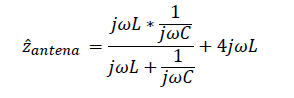



In [130]:
#definir a variavel frequencia critica encontrada no item 2.
freq_critica=6.56e6

#função que calcula a impendancia de acordo com as frequencias e sigma
def impedancia(w,sigma):
    L=sigma/freq_critica
    C=1/(sigma*freq_critica)
    Z=(1j*w*L*(1/(1j*w*C)))/(1j*w*L+(1/(1j*w*C)))+(4*1j*w*L)
    return Z

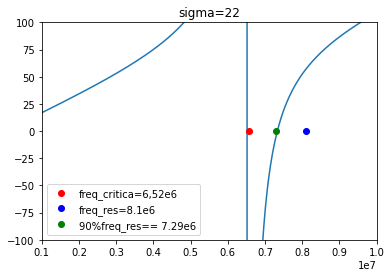

In [131]:
#lista de freq que trabalharemos
w=np.linspace(1e6,10e6,200)

#cria lista de impedancias
z=[]

#aqui podemos ajustar o valor do sigma
sigma=22

for i in w:
    z.append(np.imag(impedancia(i,sigma)))

#plotar o grafico
plt.plot(w,z)
plt.title("sigma=22")
plt.ylim((-100,100))
plt.xlim((1e6,10e6))
#plota o ponto da frequencia critica
plt.plot(freq_critica,0,"or",color="red", label= 'freq_critica=6,52e6')
#plota o ponto da frequencia de ressonancia
plt.plot(8.1e6,0,"or",color="blue", label = 'freq_res=8.1e6')
#plota o ponto 10% menor que a frequencia de ressonancia
plt.plot(7.3e6,0,"or",color="green", label = '90%freq_res== 7.29e6')
plt.legend()
plt.show()    

## Grafico da parte imaginaria da impendacia realizado no MATLAB

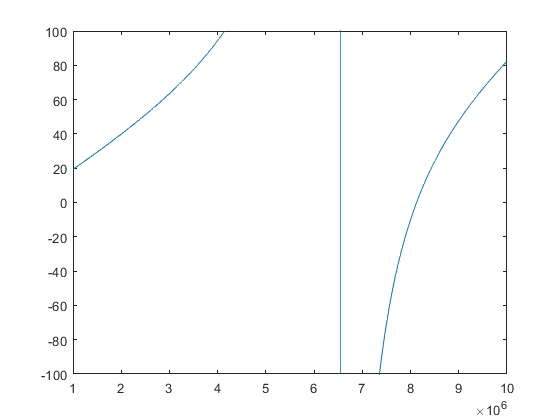

## Item 8 - Parte 2
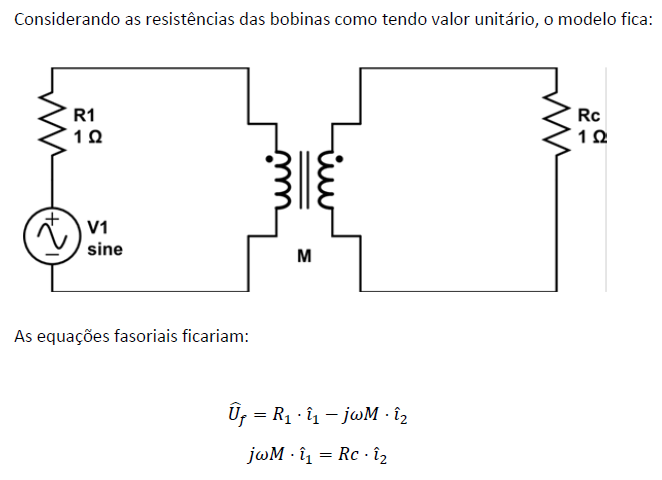



In [132]:
#freq_ress
freq_ress=7.3e6


#frequencia de ressonancia em rad/s
wr=(freq_ress)*2*pi

#Definindo a indutancia mutua a principio com o valor igual ao inverso da frequência de ressonância
M=1/wr

#Criando uma lista com a induntancia mutua diminuindo 4% a cada iteracao
listaM=[]
k=0
n=1
while k <= 24:
    listaM.append(n*M)
    n-=0.04
    k+=1
    
#Definindo as resistencias    
R1=1
Rc=1
#criando lista dos ganhos
G=[]
#loop para calcular os ganhos na frequencia de ressonancia variando a indutancia mutua
p=0
while p < len(listaM):
    Z=np.array([[R1, -1j*wr*listaM[p]],[-1j*wr*listaM[p], Rc]])
    V=np.array([1,0])
    i=np.dot(linalg.inv(Z),V)
    G.append(abs(i[1]**2/i[0]**2))
    p+=1


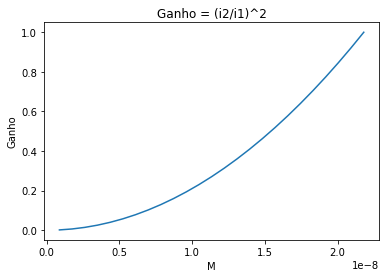

In [133]:
#plotando o grafico do ganho pela indutancia mutua
plt.plot(listaM, G)
plt.title("Ganho = (i2/i1)^2")
plt.ylabel('Ganho')
plt.xlabel('M')
plt.show()